# Requirement

2. จงใช้ SOM ในการหา BMU ของความใกล้เคียงกันของข้อมูลในไฟล์ Healthcare-dataset-stroke-data.csv ระหว่าง Age กับ Average of glucose level และ Residence_type เป็นตัวจำแนก และใช้ K-mean ในการจำแนกกราฟโดยใช้ neuron ใน SOM ดูความคล้ายคลึง และใช้ Sum square error, Silhouette Coefficient ในการประเมิณ

In [3]:
import pandas as pd
df = pd.read_csv('data/Healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
194,23410,Female,72.0,0,0,Yes,Private,Rural,97.92,26.9,smokes,1
195,64373,Male,59.0,0,0,Yes,Private,Urban,200.62,35.8,formerly smoked,1
196,58267,Male,70.0,1,0,Yes,Private,Rural,242.52,45.5,formerly smoked,1
197,35684,Male,69.0,0,0,Yes,Private,Rural,93.81,28.5,Unknown,1


In [4]:
from sklearn.preprocessing import StandardScaler

X = df[["age","avg_glucose_level"]]
Y = df[["Residence_type"]]

scaler = StandardScaler()
scaler= scaler.fit(X.values)

X_scale = scaler.transform(X.values)
print(X_scale.shape)
print(X.shape)

(199, 2)
(199, 2)


In [5]:
import simpsom as sps

# train
net = sps.SOMNet(10, 10, X_scale, PBC=True) 
net.train()

Periodic Boundary Conditions active.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Training SOM... done!


In [16]:
# model
cls = net.cluster(X_scale, clus_type='KMeans') #'MeanShift') #

<Figure size 432x288 with 0 Axes>

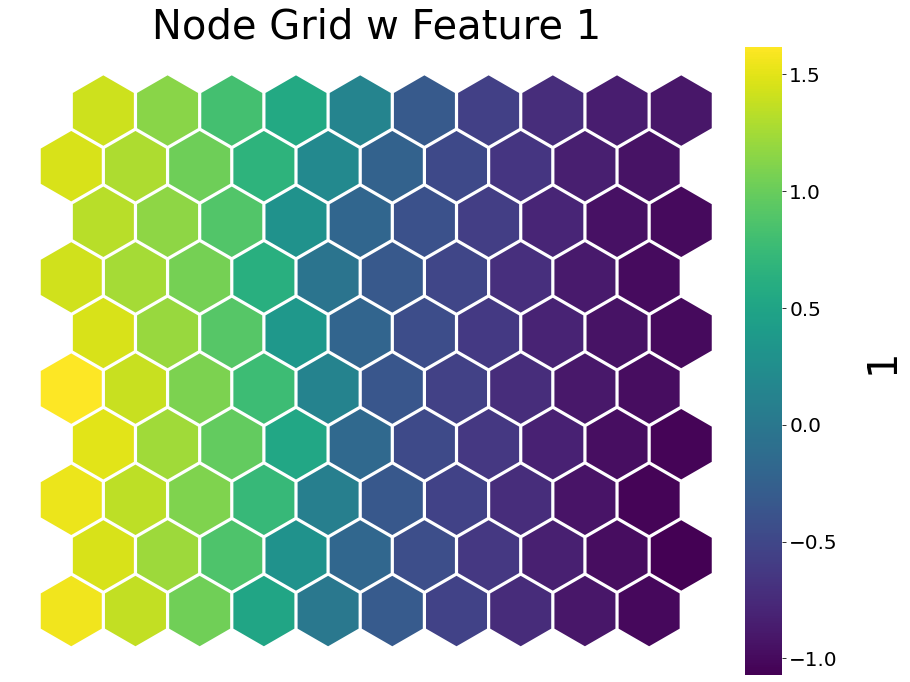

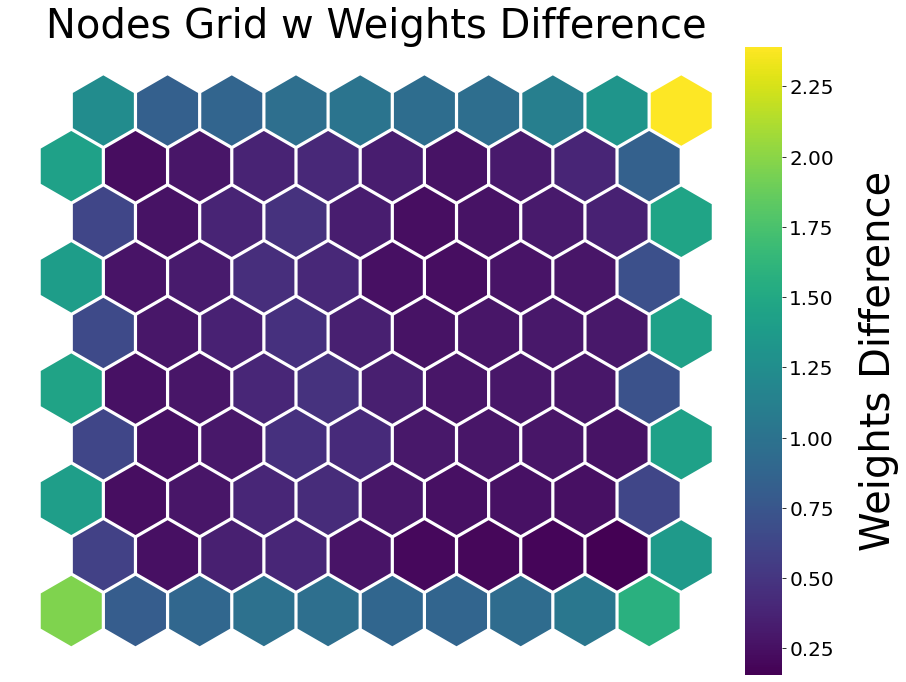

In [9]:
# plot graph
net.nodes_graph(colnum=1)
net.diff_graph()

In [12]:
# predict
import numpy as np
cls_id = np.zeros([len(X_scale)])
cls_id

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

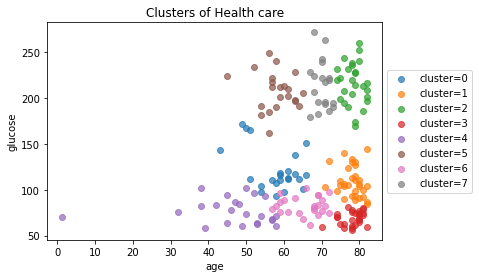

In [14]:
import matplotlib.pyplot as plt
for i in range(len(cls)):
    cls_id[cls[i]] = i
    plt.scatter(X.values[cls[i], 0],
                X.values[cls[i], 1], label='cluster='+str(i), alpha=.7)

plt.title("Clusters of Health care")
plt.xlabel("age")
plt.ylabel("glucose")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show()

In [15]:
cls_id

array([7., 5., 1., 0., 2., 2., 3., 6., 6., 3., 3., 0., 0., 2., 2., 0., 5.,
       2., 6., 5., 7., 5., 2., 2., 1., 1., 0., 5., 7., 5., 5., 4., 2., 2.,
       4., 1., 2., 6., 0., 4., 3., 4., 1., 6., 5., 2., 1., 0., 1., 4., 1.,
       3., 1., 1., 5., 5., 3., 2., 7., 5., 5., 3., 6., 4., 1., 1., 7., 1.,
       6., 3., 3., 7., 0., 5., 4., 3., 2., 1., 0., 0., 6., 6., 1., 6., 4.,
       0., 0., 3., 4., 1., 2., 3., 4., 3., 4., 2., 6., 5., 6., 6., 6., 2.,
       2., 3., 0., 6., 4., 5., 1., 4., 1., 3., 1., 5., 6., 7., 6., 3., 4.,
       1., 4., 4., 2., 5., 7., 1., 1., 3., 2., 3., 7., 1., 7., 4., 7., 7.,
       1., 2., 2., 2., 1., 0., 3., 6., 7., 0., 6., 3., 4., 7., 2., 7., 3.,
       6., 4., 2., 4., 5., 7., 3., 3., 6., 4., 2., 6., 1., 5., 3., 1., 1.,
       0., 3., 0., 1., 3., 7., 3., 3., 1., 2., 4., 0., 4., 3., 0., 0., 0.,
       2., 1., 5., 5., 0., 0., 7., 6., 5., 7., 6., 1.])

In [21]:
# Evaluation
# Silhouette Coefficient 
from sklearn.metrics import silhouette_score
sil_coeff = silhouette_score(X, cls_id, metric='euclidean')
sil_coeff

0.18583855137939662